# Exercise 1

- Create a static visualization of the unemployment rate in Kiel districts in 2019
- You may use the following starter code to get the unemplyoment data and the geo data
- Finetune the visualization to make it informative, effective, and visually appealing

In [14]:
# Starter code

import osmnx as ox
import geopandas as gpd
import pandas as pd

# Unemployment from Kiel Open Data
url = 'https://www.kiel.de/opendata/kiel_wirtschaft_arbeit_arbeitslose_betroffenheitsquote_stadtteile.csv'
df = pd.read_csv(url, sep=';', encoding='iso-8859-1', decimal=',')
df.head()

,Land,Stadt,Kategorie,Merkmal,Stadtteilnummer,Stadtteil,31.12.2019,31.12.2018,31.12.2017,31.12.2016,...,31.12.2013,31.12.2012,31.12.2011,31.12.2010,31.12.2009,31.12.2008,31.12.2007,31.12.2006,31.12.2005,31.12.2004
0,de-sh,Kiel,wirtschaft_arbeit,Betroffenheitsquote,1,Altstadt,1.6,2.3,2.3,5.0,...,4.3,4.5,4.8,5.3,4.9,4.2,5.0,5.6,10.5,7.3
1,de-sh,Kiel,wirtschaft_arbeit,Betroffenheitsquote,2,Vorstadt,4.2,3.8,5.3,6.3,...,7.1,5.3,6.3,7.4,7.4,7.4,8.1,8.1,10.4,6.6
2,de-sh,Kiel,wirtschaft_arbeit,Betroffenheitsquote,3,Exerzierplatz,7.4,7.5,7.9,8.2,...,7.6,6.5,6.4,7.1,6.6,7.2,7.3,7.2,9.9,9.8
3,de-sh,Kiel,wirtschaft_arbeit,Betroffenheitsquote,4,Damperhof,4.1,4.5,5.0,4.8,...,5.7,5.8,6.7,7.5,6.9,6.8,7.3,6.6,10.3,8.5
4,de-sh,Kiel,wirtschaft_arbeit,Betroffenheitsquote,5,Brunswik,2.7,3.3,3.9,3.8,...,4.8,4.7,5.1,5.8,5.1,4.8,5.4,6.1,9.2,8.5


In [15]:
# Geo Data from Open Street Map
tags = {'admin_level': '10'}
geo = ox.features_from_place(
    query="Kiel, Germany",
    tags=tags)
geo = geo.reset_index()
geo = geo[geo.element=='relation']

Text(0.5, 1.0, 'Unemployment Rate in Kiel')

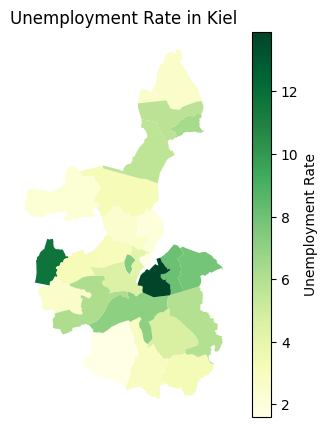

In [ ]:
# Merge the data
df_merged = pd.merge(geo, df, left_on='name', right_on='Stadtteil')
df_merged = gpd.GeoDataFrame(df_merged)

# Exercise 2

- Create a static visualization of the change in the unemployment rate in Kiel districts in between the first year and the last year contained in the dataset
- Finetune the visualization to make it informative, effective, and visually appealing

Text(0.5, 1.0, 'Unemployment Rate in Kiel')

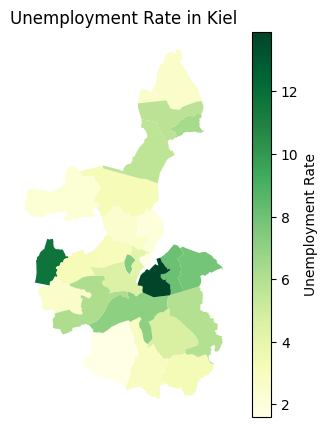

In [38]:
# Plot the map
fig = df_merged.plot(
    column='31.12.2019',
    cmap='YlGn',
    legend=True,
    legend_kwds={'label': "Unemployment Rate"},
    figsize=(5,5),
    linewidth=1
)
fig.axis('off')
fig.set_title('Unemployment Rate in Kiel')

# Exercise 3
- Use the following starter code below to identify the geographic coordinates of restaurants located in Kiel, based on Open Street Map data
- Calculate how many restaurants are located in each Kiel district (using also the geodata from the previous exercises)
- Then use a static plot to visualize the number of restaurants in each district of Kiel 
- Add a further layer on top of this plot that shows the actual locations of restaurants
- Finetune the visualization to make it informative, effective, and visually appealing

In [13]:
# Starter code 
place = 'Kiel, Germany'
tags = {'amenity': ['restaurant']}
restaurants = ox.features_from_place(place, tags=tags)